In [1]:
%%capture
# move to src folder so we can import code
%cd ../src

In [2]:
import config
from raw_learner import get_learner

In [3]:
learn = get_learner()

/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Freeze head

In [4]:
list(learn.model.children())[-1]

Linear(in_features=512, out_features=37, bias=True)

In [5]:
for layer in list(learn.model.children())[:-1]:
    if hasattr(layer, "requires_grad_"):
        layer.requires_grad_(False)

SuggestedLRs(valley=0.001737800776027143)

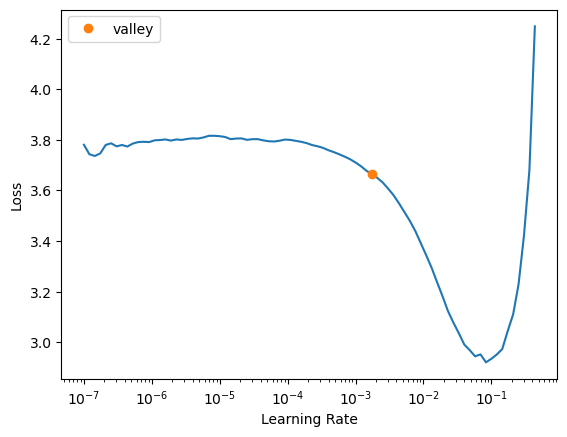

In [6]:
learn.lr_find()

Do some predictions

In [7]:
from fastai.data.external import untar_data, URLs
from raw_learner import predict

In [8]:
dataset_path = untar_data(URLs.PETS)

In [9]:
filenames = (dataset_path / "images").ls(file_exts=".jpg")

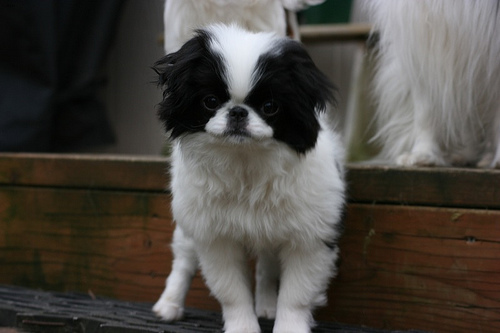

In [10]:
from PIL import Image
im = Image.open(filenames[0])
im

In [11]:
predict("raw", im)

/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/fastai/learner.py:57: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


(tensor(0, device='cuda:0'), 'japanese_chin')